回归截距: w0=[2.31522398]
回归系数: w1=[[1.57750373]]
R2 确定系数：0.9597
均方误差：0.8889
平均绝对值误差：0.7280
中位绝对值误差：0.5965


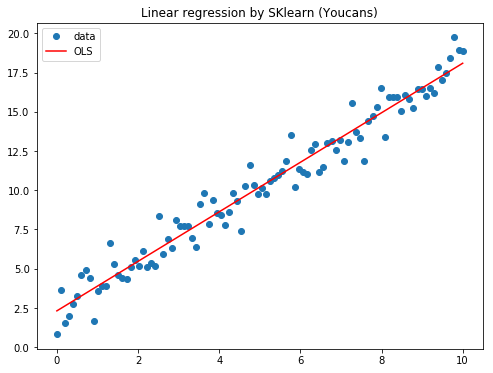

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error

# 生成测试数据:
nSample = 100
x = np.linspace(0, 10, nSample)  # 起点为 0，终点为 10，均分为 nSample个点
e = np.random.normal(size=len(x))  # 正态分布随机数
y = 2.36 + 1.58 * x + e  # y = b0 + b1*x1

# 按照模型要求进行数据转换：输入是 array类型的 n*m 矩阵，输出是 array类型的 n*1 数组
x = x.reshape(-1, 1)  # 输入转换为 n行 1列（多元回归则为多列）的二维数组
y = y.reshape(-1, 1)  # 输出转换为 n行1列的二维数组
# print(x.shape,y.shape)

# 一元线性回归：最小二乘法(OLS)
modelRegL = LinearRegression()  # 创建线性回归模型
modelRegL.fit(x, y)  # 模型训练：数据拟合
yFit = modelRegL.predict(x)  # 用回归模型来预测输出

# 输出回归结果 XUPT
print('回归截距: w0={}'.format(modelRegL.intercept_))  # w0: 截距
print('回归系数: w1={}'.format(modelRegL.coef_))  # w1,..wm: 回归系数

# 回归模型的评价指标 YouCans
print('R2 确定系数：{:.4f}'.format(modelRegL.score(x, y)))  # R2 判定系数
print('均方误差：{:.4f}'.format(mean_squared_error(y, yFit)))  # MSE 均方误差
print('平均绝对值误差：{:.4f}'.format(mean_absolute_error(y, yFit)))  # MAE 平均绝对误差
print('中位绝对值误差：{:.4f}'.format(median_absolute_error(y, yFit)))  # 中值绝对误差

# 绘图：原始数据点，拟合曲线
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'o', label="data")  # 原始数据
ax.plot(x, yFit, 'r-', label="OLS")  # 拟合数据

ax.legend(loc='best')  # 显示图例
plt.title('Linear regression by SKlearn (Youcans)')
plt.show()  


   period  price  average  advertise  difference  sales
0       1   3.85     3.80       5.50       -0.05   7.38
1       2   3.75     4.00       6.75        0.25   8.51
2       3   3.70     4.30       7.25        0.60   9.52
3       4   3.70     3.70       5.50        0.00   7.50
4       5   3.60     3.85       7.00        0.25   9.33

Model1: Y = b0 + b1*x1 + b2*x2
回归截距: w0=4.407493324688788
回归系数: w1=[1.58828573 0.56348229]
R2 确定系数：0.8860
均方误差：0.0511
平均绝对值误差：0.1676
中位绝对值误差：0.1187

Model3: Y = b0 + b1*x1 + b2*x2 + b3*x2**2
回归截距: w0=17.32436854887819
回归系数: w1=[ 1.30698873 -3.69558671  0.34861167]
R2 确定系数：0.9054
均方误差：0.0424
平均绝对值误差：0.1733
中位绝对值误差：0.1570
F统计量：82.9409
FF检验的P值：1.9438e-13


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


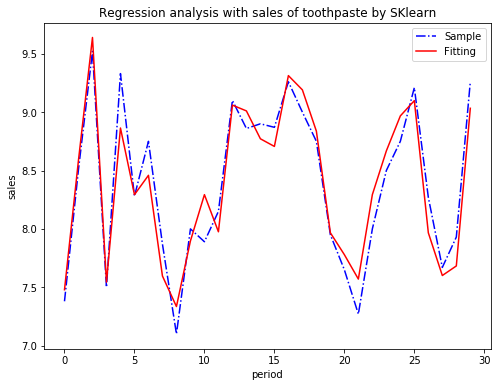

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

def main():  # 主程序
    # 读取数据文件
    readPath = "data/test.csv"  # 数据文件的地址和文件
    dfOpenFile = pd.read_csv(readPath, header=0, sep=",")  # 间隔符为逗号，首行为标题行
    dfData = dfOpenFile.dropna()  # 删除含有缺失值的数据
    print(dfData.head())

    # Model 1：Y = b0 + b1*X1 + b2*X2 + e
    # 线性回归：分析因变量 Y(sales) 与 自变量 x1(diffrence)、x2(advertise) 的关系
    # 按照模型要求进行数据转换：输入是 array类型的 n*m 矩阵，输出是 array类型的 n*1 数组
    feature_cols = ['difference', 'advertise']  # 创建特征列表
    X = dfData[feature_cols]  # 使用列表选择样本数据的特征子集
    y = dfData['sales']  # 选择样本数据的输出变量
    # print(type(X),type(y))
    # print(X.shape, y.shape)
    # 一元线性回归：最小二乘法(OLS)
    modelRegL = LinearRegression()  # 创建线性回归模型
    modelRegL.fit(X, y)  # 模型训练：数据拟合
    yFit = modelRegL.predict(X)  # 用回归模型来预测输出
    # 输出回归结果 # YouCans, XUPT
    print("\nModel1: Y = b0 + b1*x1 + b2*x2")
    print('回归截距: w0={}'.format(modelRegL.intercept_))  # w0: 截距
    print('回归系数: w1={}'.format(modelRegL.coef_))  # w1,..wm: 回归系数
    # 回归模型的评价指标
    print('R2 确定系数：{:.4f}'.format(modelRegL.score(X, y)))  # R2 判定系数
    print('均方误差：{:.4f}'.format(mean_squared_error(y, yFit)))  # MSE 均方误差
    print('平均绝对值误差：{:.4f}'.format(mean_absolute_error(y, yFit)))  # MAE 平均绝对误差
    print('中位绝对值误差：{:.4f}'.format(median_absolute_error(y, yFit)))  # 中值绝对误差

    # Model 3：Y = b0 + b1*X1 + b2*X2 + b3*X2**2 + e
    # 线性回归：分析因变量 Y(sales) 与 自变量 x1、x2 及 x2平方的关系
    x1 = dfData['difference']  # 价格差，x4 = x1 - x2
    x2 = dfData['advertise']  # 广告费
    x5 = x2**2  # 广告费的二次元
    X = np.column_stack((x1,x2,x5))  # [x1,x2,x2**2]
    # 多元线性回归：最小二乘法(OLS)
    modelRegM = LinearRegression()  # 创建线性回归模型
    modelRegM.fit(X, y)  # 模型训练：数据拟合
    yFit = modelRegM.predict(X)  # 用回归模型来预测输出
    # 输出回归结果 # YouCans, XUPT
    print("\nModel3: Y = b0 + b1*x1 + b2*x2 + b3*x2**2")
    print('回归截距: w0={}'.format(modelRegM.intercept_))  # w0: 截距
    print('回归系数: w1={}'.format(modelRegM.coef_))  # w1,..wm: 回归系数
    # 回归模型的评价指标
    print('R2 确定系数：{:.4f}'.format(modelRegM.score(X, y)))  # R2 判定系数
    print('均方误差：{:.4f}'.format(mean_squared_error(y, yFit)))  # MSE 均方误差
    print('平均绝对值误差：{:.4f}'.format(mean_absolute_error(y, yFit)))  # MAE 平均绝对误差
    print('中位绝对值误差：{:.4f}'.format(median_absolute_error(y, yFit)))  # 中值绝对误差
    # 计算 F统计量 和 F检验的 P值
    m = X.shape[1]
    n = X.shape[0]
    yMean = np.mean(y)
    SST = sum((y-yMean)**2)  # SST: 总平方和
    SSR = sum((yFit-yMean)**2)  # SSR: 回归平方和
    SSE = sum((y-yFit)**2)  # SSE: 残差平方和
    Fstats = (SSR/m) / (SSE/(n-m-1))  # F 统计量
    probFstats = stats.f.sf(Fstats, m, n-m-1)  # F检验的 P值
    print('F统计量：{:.4f}'.format(Fstats))
    print('FF检验的P值：{:.4e}'.format(probFstats))
    
    # 绘图：原始数据点，拟合曲线
    fig, ax = plt.subplots(figsize=(8, 6)) 
    ax.plot(range(len(y)), y, 'b-.', label='Sample')  # 样本数据
    ax.plot(range(len(y)), yFit, 'r-', label='Fitting')  # 拟合数据
    ax.legend(loc='best')  # 显示图例
    plt.title('Regression analysis with sales of toothpaste by SKlearn')
    plt.xlabel('period')
    plt.ylabel('sales')
    plt.show()

    return

if __name__ == '__main__':
    main()
